In [19]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (assuming it's a CSV file)
# Try reading the CSV with encoding='ISO-8859-1' or other encodings if needed
try:
    df = pd.read_csv(r"C:\Users\Anshula Sridhar\Desktop\spam.csv", encoding='ISO-8859-1')
except UnicodeDecodeError:
    print("Unicode decode error! Trying with 'latin1' encoding.")
    df = pd.read_csv(r"C:\Users\Anshula Sridhar\Desktop\spam.csv", encoding='latin1')

# Renaming columns to make them more intuitive
df.columns = ['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

# Drop the unnecessary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Check the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

# Map the 'label' column to numerical values (0 for ham, 1 for spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data into features (X) and target (y)
X = df['message']  # Features
y = df['label']    # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model using accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Accuracy: 95.78%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



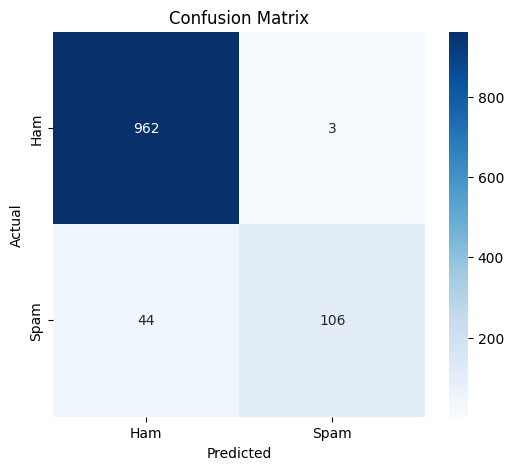

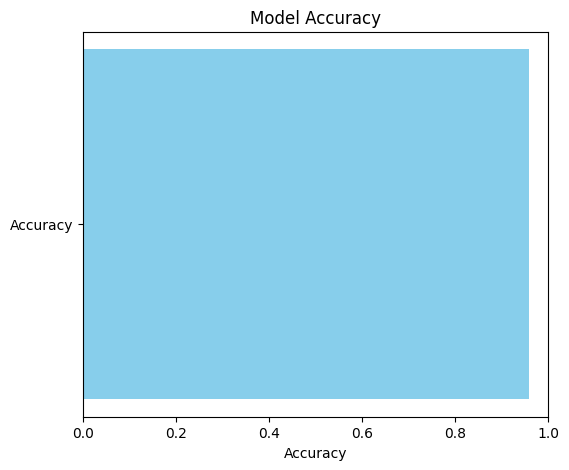

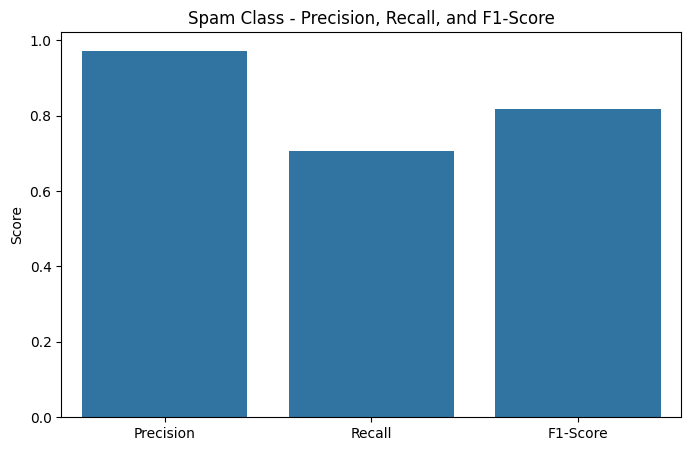

In [3]:
# Re-import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load and prepare the dataset
try:
    df = pd.read_csv(r"C:\Users\Anshula Sridhar\Desktop\spam.csv", encoding='ISO-8859-1')
except UnicodeDecodeError:
    print("Unicode decode error! Trying with 'latin1' encoding.")
    df = pd.read_csv(r"C:\Users\Anshula Sridhar\Desktop\spam.csv", encoding='latin1')

df.columns = ['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Map the 'label' column to numerical values (0 for ham, 1 for spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data into features (X) and target (y)
X = df['message']  # Features
y = df['label']    # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy Plot
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.barh(['Accuracy'], [accuracy], color='skyblue')
plt.xlim(0, 1)
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.show()

# Precision, Recall, and F1-Score Plot (updated to avoid warning)
metrics = classification_report(y_test, y_pred, output_dict=True)
precision = metrics['1']['precision']
recall = metrics['1']['recall']
f1_score = metrics['1']['f1-score']

plt.figure(figsize=(8, 5))
sns.barplot(x=['Precision', 'Recall', 'F1-Score'], y=[precision, recall, f1_score])
plt.title('Spam Class - Precision, Recall, and F1-Score')
plt.ylabel('Score')
plt.show()


